In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("./data/tweets_features.csv", encoding='latin')
df.drop(['is_after_certain_day'], axis=1, inplace=True)

<Axes: >

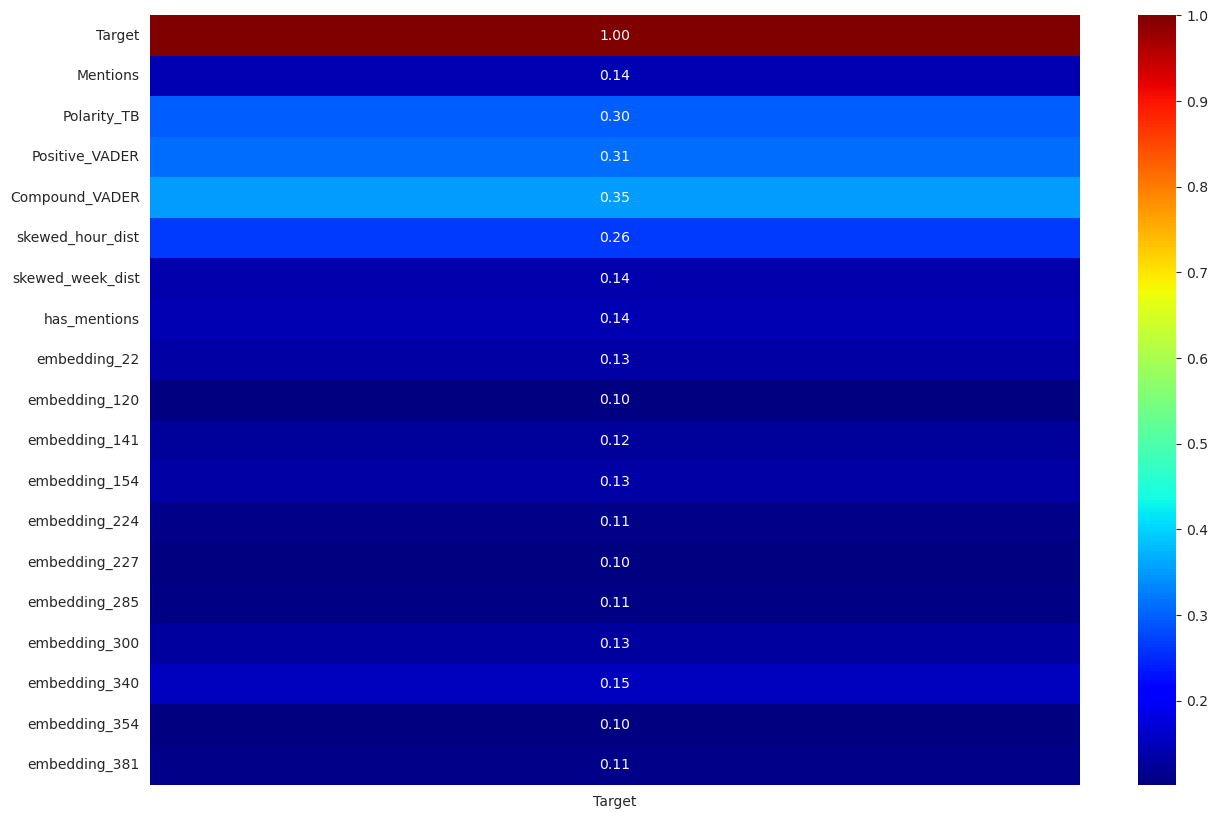

In [24]:
import seaborn as sns

corr = df.select_dtypes(include=['number']).corr()

corr_filtered = corr[corr["Target"] > 0.1]

plt.figure(figsize=(15, 10))
sns.heatmap(corr_filtered[["Target"]], annot=True, fmt=".2f", cmap='jet', cbar=True, square=False)

In [25]:
from sklearn.preprocessing import StandardScaler

X = df.select_dtypes(include=['number'])
X = X.drop(['Target'], axis=1)
y = df['Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from feature_engine.selection import SelectBySingleFeaturePerformance

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_scaled, y)
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances = feature_importances[feature_importances > 0.005]

In [44]:
feature_importances["Target"] = 1
df_filtered = df.loc[:, feature_importances.index]
X = df_filtered.drop(['Target'], axis=1)
y = df_filtered['Target']

In [49]:
prf = SelectBySingleFeaturePerformance(
    estimator=RandomForestClassifier(random_state=2115),
    scoring='roc_auc',
    cv=3,
    threshold=0.6,
)

X_train_t = prf.fit_transform(X, y)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(C=0.001, class_weight='balanced', penalty='l1', solver='liblinear', random_state=2115)

log_clf.fit(X_scaled, y)

model = SelectFromModel(log_clf, prefit=True)
X_train_t = model.transform(X_scaled)
X_train_t.shape

In [ ]:
feature_names = X.columns
selected_mask = model.get_support()
selected_features = feature_names[selected_mask]
print("Selected features:", selected_features)